<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">Time Series</h1>
</div>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: black;">Time Series:</h2>
    <p style="font-size: 16px; color: black;">
        Time series is a sequence of data points typically measured at successive points in time, spaced at uniform time intervals. Examples of time series data include daily stock prices, monthly sales figures, annual rainfall measurements, and hourly temperature readings. Time series data is crucial for various fields, including finance, economics, environmental science, and engineering, as it allows for the analysis and forecasting of trends, patterns, and future values.
    </p>
    <h3 style="color: darkblue;">Importance of Time Series:</h3>
    <p style="font-size: 16px; color: black;">
        Time series analysis is essential for several reasons:
    </p>
    <ul style="font-size: 16px; color: black;">
        <li style="margin-bottom: 10px;"><b style="color: purple;">Trend Analysis:</b> Identifying and understanding long-term trends in data, which can help in making strategic decisions.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Seasonality:</b> Detecting seasonal patterns, such as higher sales during holidays, which can be crucial for planning and resource allocation.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Forecasting:</b> Predicting future values based on historical data, which is vital for budgeting, inventory management, and policy making.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Anomaly Detection:</b> Identifying unusual events or outliers that can indicate significant changes or errors in the data collection process.</li>
    </ul>
    <h3 style="color: darkblue;">Topics in Time Series:</h3>
    <p style="font-size: 16px; color: black;">
        Time series analysis encompasses various topics, including:
    </p>
    <ul style="font-size: 16px; color: black;">
        <li style="margin-bottom: 10px;"><b style="color: purple;">Stationarity:</b> Determining whether a time series has a constant mean and variance over time, which is a critical assumption for many time series models.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Decomposition:</b> Breaking down a time series into trend, seasonal, and residual components to better understand the underlying patterns.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Smoothing:</b> Applying techniques like moving averages to smooth out short-term fluctuations and highlight long-term trends.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Autocorrelation:</b> Analyzing the correlation between values at different time lags to identify repeating patterns.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Time Series Models:</b> Developing models like ARIMA (AutoRegressive Integrated Moving Average), Exponential Smoothing, and State Space Models to analyze and forecast time series data.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Seasonal Adjustment:</b> Removing seasonal effects from a time series to better analyze non-seasonal trends.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Spectral Analysis:</b> Examining the frequency domain properties of a time series to identify cyclical patterns.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Machine Learning for Time Series:</b> Using advanced techniques like recurrent neural networks (RNNs) and long short-term memory networks (LSTMs) for more complex time series forecasting and pattern recognition.</li>
    </ul>
</div>


<div style="border: 2px dashed black; border-radius: 10px; padding: 15px;">
    <h2 style="color: green;">Meaning of Time Series:</h2>
    <p style="font-size: 16px; color: black;">
        A time series is a sequence of data points indexed in time order. Formally, a time series \( \{X_t\}_{t=1}^n \) is a collection of random variables where \( t \) represents the time index and \( n \) is the length of the series. Each data point \( X_t \) represents an observation made at time \( t \). Time series analysis involves studying the structure, patterns, and characteristics of such sequences over time.
    </p>

</div>

<div style="border: 2px dashed black; border-radius: 10px; padding: 15px;">
    <h2 style="color: green;">Explanation of Rolling Window:</h2>
    <p style="font-size: 16px; color: black;">
        A rolling window is a moving window function applied to time series data to smooth out short-term fluctuations and highlight long-term trends or patterns. It involves calculating a summary statistic, such as the mean or the sum, over a fixed-size window of consecutive observations.
    </p>
    <p style="font-size: 16px; color: black;">
        Mathematically, the rolling window operation can be expressed as follows:
    </p>
    <p style="font-size: 16px; color: black;">
        Let \( x_1, x_2, \ldots, x_n \) be a time series of length \( n \), and let \( w \) be the window size.
    </p>
    <p style="font-size: 16px; color: black;">
        The rolling window function \( R(x_i, w) \) calculates a summary statistic, denoted by \( S(x_i, w) \), over a window of size \( w \) centered at each observation \( x_i \). It can be represented as:
    </p>
    <p style="font-size: 16px; color: black;">
        \[ S(x_i, w) = f(x_{i-\frac{w-1}{2}}, x_{i-\frac{w-1}{2}+1}, \ldots, x_{i}, \ldots, x_{i+\frac{w-1}{2}}) \]
    </p>
    <p style="font-size: 16px; color: black;">
        Where \( f \) is the summary statistic function (e.g., mean, sum) and \( x_i \) represents the observation at time \( i \).
    </p>
</div>


In [32]:
# I am going to read a weekly time series.
df_sales = pd.read_csv(r'C:\D\Python\Python-Projects\Data-Science-Python\Files\archive\sales data-set.csv')

df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [34]:
#  The Date column is not of Date type; it is of object type. 
#  So, I convert it to Date type
display( df_sales['Date'].head() )

df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Sorting the table by Date column 
df_sales.sort_values('Date' , inplace= True )

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]

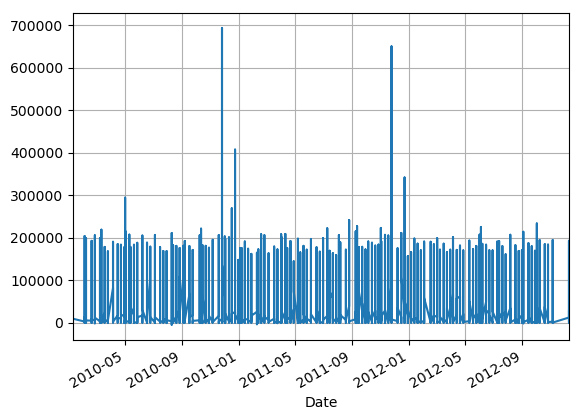

In [20]:
# Making a plot 
df_sales.set_index('Date')['Weekly_Sales'].plot()
plt.grid()
plt.show()

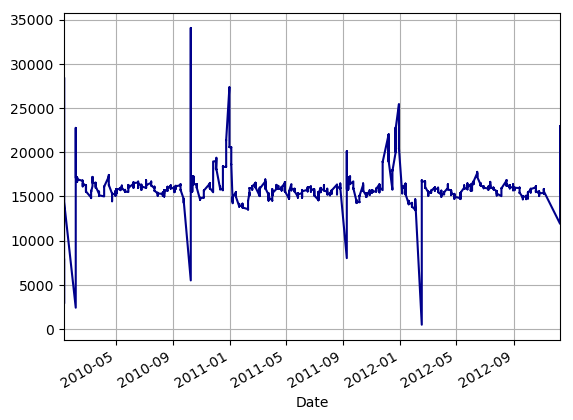

In [35]:
# Based on the plot, it is not possible to determine if there is a trend or not.
# Applying a rolling window of size 14 days can provide better insights into whether there is a trend or not.
df_sales.set_index('Date')['Weekly_Sales'].rolling('14D').mean().plot( color = 'darkblue')
plt.grid()

plt.show()

<div style="border: 2px dashed black ; border-radius: 10px; padding: 15px;">
    <h2 style="color: green;">Temporal Dependence in Time Series:</h2>
    <p style="font-size: 16px; color: black;">
        Temporal dependence, also known as serial dependence or autocorrelation, refers to the relationship between successive observations in a time series. Formally, temporal dependence indicates that the value of a data point at time \( t \) is influenced by the values of previous observations at times \( t-1, t-2, \ldots, t-k \).
    </p>
    <p style="font-size: 16px; color: black;">
        Mathematically, temporal dependence can be expressed using the autocorrelation function (ACF). The ACF at lag \( k \), denoted by \( \rho_k \), measures the correlation between observations \( X_t \) and \( X_{t-k} \), where \( k \) represents the number of time intervals between the observations. In a stationary time series, the ACF decreases as the lag increases, indicating weaker dependence between distant observations.
    </p>
    <h3 style="color: black;">The Necessity of Dependence in Time Series:</h3>
    <p style="font-size: 16px; color: black;">
        Dependence is essential when defining a time series because it captures the sequential structure inherent in the data. Without temporal dependence, a time series would be merely a collection of unrelated observations, making it difficult to analyze patterns, trends, and relationships over time. Temporal dependence allows for the application of forecasting models and statistical techniques that exploit the information contained in past observations to predict future values.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: black;">Meaning of Time Series:</h2>
    <p style="font-size: 16px; color: black;">
        A time series is a sequence of data points indexed in time order. Formally, a time series \( \{X_t\}_{t=1}^n \) is a collection of random variables where \( t \) represents the time index and \( n \) is the length of the series. Each data point \( X_t \) represents an observation made at time \( t \). Time series analysis involves studying the structure, patterns, and characteristics of such sequences over time.
    </p>
    <h3 style="color: black;">Basic Concepts about Time Series:</h3>
    <p style="font-size: 16px; color: black;">
        Time series analysis encompasses several fundamental concepts:
    </p>
    <ul style="font-size: 16px; color: black;">
        <li style="margin-bottom: 10px;"><b style="color: purple;">Temporal Dependence:</b> Time series data exhibits temporal dependence, meaning that the value of \( X_t \) is influenced by previous observations \( X_{t-1}, X_{t-2}, \ldots, X_{t-k} \). This dependence can be exploited to make predictions about future values.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Trend:</b> A trend represents a long-term movement or direction in the data. Trends can be increasing, decreasing, or stable over time and are often characterized using regression analysis or moving averages.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Seasonality:</b> Seasonality refers to periodic patterns or fluctuations in the data that occur at fixed intervals, such as daily, weekly, monthly, or yearly. Seasonal effects can be identified using techniques like seasonal decomposition or Fourier analysis.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Stationarity:</b> A time series is stationary if its statistical properties, such as mean, variance, and autocorrelation, remain constant over time. Stationarity is a crucial assumption for many time series models and can be assessed using statistical tests or visual inspection.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Autocorrelation:</b> Autocorrelation measures the correlation between a time series and a lagged version of itself. It quantifies the degree of dependence between observations at different time points and is essential for identifying patterns and relationships in the data.</li>
        <li style="margin-bottom: 10px;"><b style="color: purple;">Forecasting:</b> Time series forecasting involves predicting future values of a time series based on historical data. Forecasting methods range from simple techniques like exponential smoothing to complex models such as ARIMA (AutoRegressive Integrated Moving Average) and machine learning algorithms.</li>
    </ul>
</div>
